In [1]:
import os
import pandas as pd


df = pd.read_csv(os.getcwd()+'/fake_job_postings.csv')

In [2]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [4]:
df.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [5]:
(df.fraudulent==1).sum()/len(df)*100

4.8434004474272925

In [6]:
df.title.value_counts()

English Teacher Abroad                                                   311
Customer Service Associate                                               146
Graduates: English Teacher Abroad (Conversational)                       144
English Teacher Abroad                                                    95
Software Engineer                                                         86
                                                                        ... 
Junior Sales Manager                                                       1
Customer Care Representative                                               1
Oracle Financial Functional Consultant || Richmond VA || Full Time ||      1
Information Technology Sales Professional                                  1
Help Desk Technician/Engineer Tiers I-II $35K-$45K DOE                     1
Name: title, Length: 11231, dtype: int64

In [7]:
df.location.value_counts()

GB, LND, London          718
US, NY, New York         658
US, CA, San Francisco    472
GR, I, Athens            464
US, ,                    339
                        ... 
US, TX, Ft. Worth          1
US, SD, Aberdeen           1
US, IN, Mount Vernon       1
US, GA, Alpharetta         1
GB, , Reading              1
Name: location, Length: 3105, dtype: int64

In [ ]:
#pip install wordcloud

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

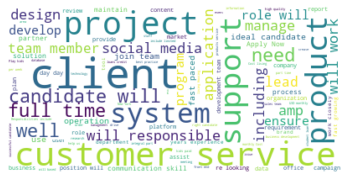

In [42]:
# Start with one review:
text = df.description.str.cat(sep=',')


# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

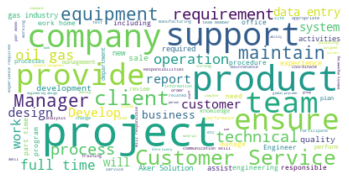

In [57]:
desc1 = df[df.fraudulent==1]['description'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(desc1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

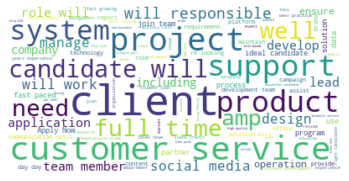

In [58]:
desc0 = df[df.fraudulent==0]['description'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(desc0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [60]:
import numpy as np
df['desc_project'] = np.where(df['description'].str.contains('project'),1,0)

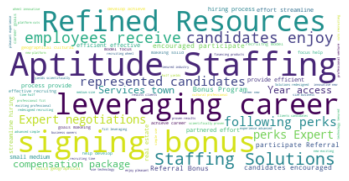

In [62]:
cp1 = df[df.fraudulent==1]['company_profile'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(cp1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

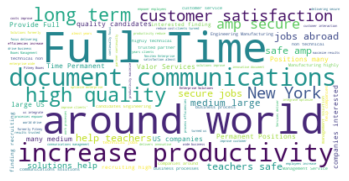

In [63]:
cp0 = df[df.fraudulent==0]['company_profile'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100,
                      background_color="white").generate(cp0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [64]:
df['cp_staffing'] = np.where(df['company_profile'].str.contains('Aptitude Staffing'),1,0)
df['cp_fulltime'] = np.where(df['company_profile'].str.contains('Full Time'),1,0)
df['cp_resources'] = np.where(df['company_profile'].str.contains('Refined Resources'),1,0)



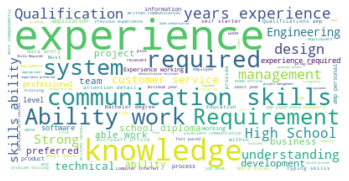

In [65]:
req1 = df[df.fraudulent==1]['requirements'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(req1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

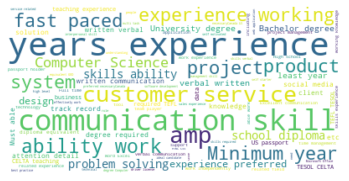

In [66]:
req0 = df[df.fraudulent==0]['requirements'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(req0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

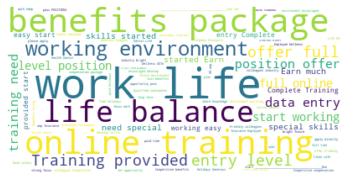

In [67]:
ben1 = df[df.fraudulent==1]['benefits'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(ben1)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

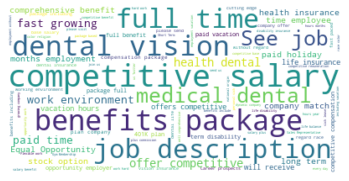

In [69]:
ben0 = df[df.fraudulent==0]['benefits'].str.cat(sep=', ')
wordcloud = WordCloud(max_font_size=50, 
                      max_words=100, 
                      background_color="white").generate(ben0)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [70]:
df['cp_worklife'] = np.where(df['benefits'].str.contains('work life'),1,0)
df['cp_balance'] = np.where(df['benefits'].str.contains('life balance'),1,0)
df['cp_salary'] = np.where(df['benefits'].str.contains('competitive salary'),1,0)
df['cp_package'] = np.where(df['benefits'].str.contains('benefits package'),1,0)
df['cp_online'] = np.where(df['benefits'].str.contains('online training'),1,0)

In [71]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'desc_project', 'cp_staffing', 'cp_fulltime',
       'cp_resources', 'cp_worklife', 'cp_balance', 'cp_salary', 'cp_package',
       'cp_online'],
      dtype='object')

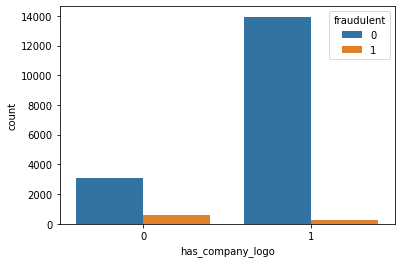

In [77]:
import seaborn as sns
ax = sns.countplot(x="has_company_logo", hue="fraudulent", data=df)
ax

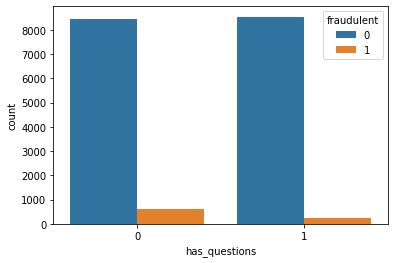

In [78]:
import seaborn as sns
ax = sns.countplot(x="has_questions", hue="fraudulent", data=df)
ax

In [87]:
df.industry.value_counts()

Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Alternative Dispute Resolution            1
Wine and Spirits                          1
Sporting Goods                            1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [117]:
top_fraud = df[df.fraudulent==1].industry.value_counts()
top_fraud2 = pd.DataFrame(top_fraud.head()).reset_index()
top_fraud2.columns=['industry','count']
top_fraud2

,industry,count
0,Oil & Energy,109
1,Accounting,57
2,Hospital & Health Care,51
3,Marketing and Advertising,45
4,Financial Services,35


In [118]:
top_legit = df[df.fraudulent==0].industry.value_counts()
top_legit2 = pd.DataFrame(top_legit.head()).reset_index()
top_legit2.columns=['industry','count']
top_legit2

,industry,count
0,Information Technology and Services,1702
1,Computer Software,1371
2,Internet,1062
3,Education Management,822
4,Marketing and Advertising,783


In [105]:
df[df.industry=='Information Technology and Services'].fraudulent.value_counts()

0    1702
1      32
Name: fraudulent, dtype: int64

In [106]:
df[df.industry=='Oil & Energy'].fraudulent.value_counts()

0    178
1    109
Name: fraudulent, dtype: int64

In [ ]:
df.groupby([])